# STA130 Course Project

> See [here](https://github.com/pointOfive/stat130chat130/blob/main/CP/STA130F23_course_project_specification.ipynb) further details!!

The data we'll use for the Fall 2024 STA130 course project is based on the [Canadian Social Connection Survey](https://casch.org/cscs) (CSCS) run by [genwell](https://genwell.ca/) and the [Canadian Alliance for Social Connection and Health](https://casch.org/) (CASCH). This data is used to produce [Rapid Evidence Briefs](https://casch.org/publications) which scientifically analyze the importance of social connection and community engagement -- relationships with family, friends, coworkers, neighbours, and strangers -- for personal health and well-being. The purpose of our course project is to help raise awareness about and interest in this often under appreciated topic. To do so STA130 students will do "data blitz" to discover interesting information and identify key statistics hidden inside the CSCS data. The findings each project team produces will be shared with other UofT courses (in Digital Humanities, Writing, Sociology, etc.) and other genwell and CASCH associated teams specializing in communications and media relations, and they will transform the most interesting findings of our teams into content for social media campaigns. If our findings are important enough, they may even form the basis of future Rapid Evidence Briefs...

> In conjuction with this project, we are taking part in a reserach project "investigating the impact of community engaged learning on student happiness, satisfaction, and well-being" (alongside multiple courses in Pharmacology and Toxicology, Human Biology, and Psychology). We are curious to know if you find this project altruistic, and how this in turn might influece your own experience in the course, and beyond.

To use this data ethically, professionally, and appropriately we must take a quick look and abide by the [data use agreement](https://static1.squarespace.com/static/60283c2e174c122f8ebe0f39/t/6239c284d610f76fed5a2e69/1647952517436/Data+Use+Agreement+for+the+Canadian+Social+Connection+Survey.pdf). You should also take a quick look at the [list of available variables](https://drive.google.com/file/d/1ISVymGn-WR1lcRs4psIym2N3or5onNBi/view) and then check out the [data](https://drive.google.com/file/d/1mbUQlMTrNYA7Ly5eImVRBn16Ehy9Lggo/view) itself (available at the bottom of the [CSCS](https://casch.org/cscs) webpage).


Variables: 
PSYCH_zimet_multidimensional_social_support_scale_family_helps - My family really tries to help me
PSYCH_zimet_multidimensional_social_support_scale_family_emotional - I get the emotional help and support I need from my family
PSYCH_zimet_multidimensional_social_support_scale_problems_family - I can talk about my problems with my family

PSYCH_zimet_multidimensional_social_support_scale_help - My friends really try to help me.
PSYCH_zimet_multidimensional_social_support_scale_go_wrong - I can count on my friends when things go wrong
PSYCH_zimet_multidimensional_social_support_scale_problems_friends - I can talk about my problems with my friends

PSYCH_zimet_multidimensional_social_support_scale_sorrows - I have friends or family members with whom I can share my joys and sorrows
PSYCH_zimet_multidimensional_social_support_scale_decisions - My friends and family are willing to help me make decisions

In [1]:
import pandas as pd
#Data set
url_col = "https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/var_names.csv"
url_data = "https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv"

cols = pd.read_csv(url_col)
data = pd.read_csv(url_data, na_values=["9999", "", " ", "Presented but no response", "NA"])

empty = (data.isna().sum() == data.shape[0])
data = data[empty.index[~empty]]

dataV2 = data[data.REMOVE_case=='No'].copy()
dataV2_cohort = dataV2[dataV2.SURVEY_cohort_participant].copy()
dataV2_cohortV2 = dataV2_cohort[dataV2_cohort.SURVEY_collection_year!=2023].copy()
missingness_limit = 100 # this retains 166 of 1024 columns that aren't fully empty
columns2keep = dataV2_cohortV2.isna().sum() < missingness_limit
columns2keep = columns2keep.index[columns2keep]
dataV2_cohortV3 = dataV2_cohortV2[columns2keep].copy()

data.shape

/tmp/ipykernel_172/1808008904.py:7: DtypeWarning: Columns (129,408,630,671,689,978,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1263,1266,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1439,1442,1463,1546,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(url_data, na_values=["9999", "", " ", "Presented but no response", "NA"])


(11431, 1779)

In [2]:
#Focused Data set
# Specify the variables to keep
variables_to_keep = ["PSYCH_zimet_multidimensional_social_support_scale_family_helps",
    "PSYCH_zimet_multidimensional_social_support_scale_family_emotional",
    "PSYCH_zimet_multidimensional_social_support_scale_problems_family",
    "PSYCH_zimet_multidimensional_social_support_scale_help",
    "PSYCH_zimet_multidimensional_social_support_scale_go_wrong",
    "PSYCH_zimet_multidimensional_social_support_scale_problems_friends",
    "PSYCH_zimet_multidimensional_social_support_scale_sorrows",
    "PSYCH_zimet_multidimensional_social_support_scale_decisions"
]

# Filter the dataset for the specified variables
new_data = dataV2_cohortV3[variables_to_keep].copy()
new_data_cleaned = new_data.fillna(0)  # Replace NaN with 0


# Display the selected data
pd.set_option('display.max_columns', len(variables_to_keep))
new_data_cleaned


,PSYCH_zimet_multidimensional_social_support_scale_family_helps,PSYCH_zimet_multidimensional_social_support_scale_family_emotional,PSYCH_zimet_multidimensional_social_support_scale_problems_family,PSYCH_zimet_multidimensional_social_support_scale_help,PSYCH_zimet_multidimensional_social_support_scale_go_wrong,PSYCH_zimet_multidimensional_social_support_scale_problems_friends,PSYCH_zimet_multidimensional_social_support_scale_sorrows,PSYCH_zimet_multidimensional_social_support_scale_decisions
19,Very Strongly Agree,Very Strongly Agree,Agree,Strongly Agree,Neither Agree Nor Disagree,Agree,Strongly Agree,Neither Agree Nor Disagree
21,Very Strongly Agree,Very Strongly Agree,Strongly Agree,Very Strongly Agree,Very Strongly Agree,Strongly Agree,Very Strongly Agree,Strongly Agree
71,Very Strongly Agree,Agree,Agree,Very Strongly Agree,Very Strongly Agree,Strongly Agree,Strongly Agree,Very Strongly Agree
77,Disagree,Neither Agree Nor Disagree,Neither Agree Nor Disagree,Neither Agree Nor Disagree,Strongly Agree,Agree,Agree,Agree
78,Neither Agree Nor Disagree,Neither Agree Nor Disagree,Agree,Neither Agree Nor Disagree,Strongly Agree,Agree,Strongly Agree,Agree
...,...,...,...,...,...,...,...,...
11379,Very Strongly Disagree,Very Strongly Disagree,Very Strongly Disagree,Agree,Neither Agree Nor Disagree,Agree,Agree,Neither Agree Nor Disagree
11380,Very Strongly Disagree,Very Strongly Disagree,Very Strongly Disagree,Strongly Agree,Agree,Agree,Strongly Agree,Neither Agree Nor Disagree
11412,Very Strongly Agree,Strongly Agree,Agree,Agree,Neither Agree Nor Disagree,Strongly Disagree,Agree,Agree
11428,Disagree,Disagree,Neither Agree Nor Disagree,Neither Agree Nor Disagree,Neither Agree Nor Disagree,Agree,Neither Agree Nor Disagree,Disagree


In [3]:
# Here's a high level summary of the data
for col in new_data_cleaned.columns:
    col_summary = new_data_cleaned[col].value_counts(dropna=False)
    if len(col_summary)<11:
        print(col_summary, "\n")
    else:
        print(col, new_data_cleaned[col].shape, "\n")

PSYCH_zimet_multidimensional_social_support_scale_family_helps
Agree                         182
Very Strongly Agree           171
Neither Agree Nor Disagree    155
Strongly Agree                120
Disagree                       94
Very Strongly Disagree         48
0                              42
Strongly Disagree              38
Name: count, dtype: int64 

PSYCH_zimet_multidimensional_social_support_scale_family_emotional
Agree                         192
Neither Agree Nor Disagree    155
Disagree                      130
Very Strongly Agree           118
Strongly Agree                103
Very Strongly Disagree         65
Strongly Disagree              44
0                              43
Name: count, dtype: int64 

PSYCH_zimet_multidimensional_social_support_scale_problems_family
Agree                         204
Neither Agree Nor Disagree    132
Disagree                      123
Strongly Agree                114
Very Strongly Agree           102
Very Strongly Disagree         68


In [4]:
import pandas as pd

# Define the scale map
scale_map = {
    'Very Strongly Disagree': 1.0,
    'Strongly Disagree': 2.0,
    'Disagree': 3.0,
    'Neither Agree Nor Disagree': 4.0,
    'Agree': 5.0,
    'Strongly Agree': 6.0,
    'Very Strongly Agree': 7.0
}

# Column classification
family_columns = [
    "PSYCH_zimet_multidimensional_social_support_scale_family_helps",
    "PSYCH_zimet_multidimensional_social_support_scale_family_emotional",
    "PSYCH_zimet_multidimensional_social_support_scale_problems_family"
]

friends_columns = [
    "PSYCH_zimet_multidimensional_social_support_scale_help",
    "PSYCH_zimet_multidimensional_social_support_scale_go_wrong",
    "PSYCH_zimet_multidimensional_social_support_scale_problems_friends"
]

both_columns = [
    "PSYCH_zimet_multidimensional_social_support_scale_family_helps",
    "PSYCH_zimet_multidimensional_social_support_scale_family_emotional",
    "PSYCH_zimet_multidimensional_social_support_scale_problems_family",
    "PSYCH_zimet_multidimensional_social_support_scale_help",
    "PSYCH_zimet_multidimensional_social_support_scale_go_wrong",
    "PSYCH_zimet_multidimensional_social_support_scale_problems_friends",
    "PSYCH_zimet_multidimensional_social_support_scale_sorrows",
    "PSYCH_zimet_multidimensional_social_support_scale_decisions"
]

# Clean and map the data
new_data_cleaned = new_data_cleaned.map(lambda x: scale_map.get(x.strip(), x) if isinstance(x, str) else x)

# Calculate individual mean scores
family_data = new_data_cleaned[family_columns].astype(float)
family_data['family_mean'] = family_data.mean(axis=1)

friends_data = new_data_cleaned[friends_columns].astype(float)
friends_data['friends_mean'] = friends_data.mean(axis=1)

both_data = new_data_cleaned[both_columns].astype(float)
both_data['both_mean'] = both_data.mean(axis=1)

# Combine all individual scores into a new dataset
combined_individual_data = pd.concat([family_data, friends_data, both_data], axis=1)
combined_individual_data



,PSYCH_zimet_multidimensional_social_support_scale_family_helps,PSYCH_zimet_multidimensional_social_support_scale_family_emotional,PSYCH_zimet_multidimensional_social_support_scale_problems_family,family_mean,...,PSYCH_zimet_multidimensional_social_support_scale_problems_friends,PSYCH_zimet_multidimensional_social_support_scale_sorrows,PSYCH_zimet_multidimensional_social_support_scale_decisions,both_mean
19,7.0,7.0,5.0,6.333333,...,5.0,6.0,4.0,5.500
21,7.0,7.0,6.0,6.666667,...,6.0,7.0,6.0,6.625
71,7.0,5.0,5.0,5.666667,...,6.0,6.0,7.0,6.250
77,3.0,4.0,4.0,3.666667,...,5.0,5.0,5.0,4.500
78,4.0,4.0,5.0,4.333333,...,5.0,6.0,5.0,4.875
...,...,...,...,...,...,...,...,...,...
11379,1.0,1.0,1.0,1.000000,...,5.0,5.0,4.0,3.250
11380,1.0,1.0,1.0,1.000000,...,5.0,6.0,4.0,3.625
11412,7.0,6.0,5.0,6.000000,...,2.0,5.0,5.0,4.875
11428,3.0,3.0,4.0,3.333333,...,5.0,4.0,3.0,3.750


In [13]:
# Calculate the mean for each column
column_mean = combined_individual_data.mean()

# Display the column means
print("Column Mean:\n", column_mean)


Column Mean:
 PSYCH_zimet_multidimensional_social_support_scale_family_helps        4.532941
PSYCH_zimet_multidimensional_social_support_scale_family_emotional    4.196471
PSYCH_zimet_multidimensional_social_support_scale_problems_family     4.130588
family_mean                                                           4.286667
PSYCH_zimet_multidimensional_social_support_scale_help                4.474118
PSYCH_zimet_multidimensional_social_support_scale_go_wrong            4.536471
PSYCH_zimet_multidimensional_social_support_scale_problems_friends    4.661176
friends_mean                                                          4.557255
PSYCH_zimet_multidimensional_social_support_scale_family_helps        4.532941
PSYCH_zimet_multidimensional_social_support_scale_family_emotional    4.196471
PSYCH_zimet_multidimensional_social_support_scale_problems_family     4.130588
PSYCH_zimet_multidimensional_social_support_scale_help                4.474118
PSYCH_zimet_multidimensional_social_su

In [12]:
# Calculate the mean for each column
column_std = combined_individual_data.std()

# Display the column means
print("Column Std:\n", column_std)


Column Std:
 PSYCH_zimet_multidimensional_social_support_scale_family_helps        1.974388
PSYCH_zimet_multidimensional_social_support_scale_family_emotional    1.945121
PSYCH_zimet_multidimensional_social_support_scale_problems_family     1.954279
family_mean                                                           1.843942
PSYCH_zimet_multidimensional_social_support_scale_help                1.736442
PSYCH_zimet_multidimensional_social_support_scale_go_wrong            1.794301
PSYCH_zimet_multidimensional_social_support_scale_problems_friends    1.723673
friends_mean                                                          1.664562
PSYCH_zimet_multidimensional_social_support_scale_family_helps        1.974388
PSYCH_zimet_multidimensional_social_support_scale_family_emotional    1.945121
PSYCH_zimet_multidimensional_social_support_scale_problems_family     1.954279
PSYCH_zimet_multidimensional_social_support_scale_help                1.736442
PSYCH_zimet_multidimensional_social_sup

In [14]:
# Calculate the mean for each column
column_median = combined_individual_data.median()

# Display the column means
print("Column Median:\n", column_median)


Column Median:
 PSYCH_zimet_multidimensional_social_support_scale_family_helps        5.000000
PSYCH_zimet_multidimensional_social_support_scale_family_emotional    4.000000
PSYCH_zimet_multidimensional_social_support_scale_problems_family     4.000000
family_mean                                                           4.666667
PSYCH_zimet_multidimensional_social_support_scale_help                5.000000
PSYCH_zimet_multidimensional_social_support_scale_go_wrong            5.000000
PSYCH_zimet_multidimensional_social_support_scale_problems_friends    5.000000
friends_mean                                                          4.666667
PSYCH_zimet_multidimensional_social_support_scale_family_helps        5.000000
PSYCH_zimet_multidimensional_social_support_scale_family_emotional    4.000000
PSYCH_zimet_multidimensional_social_support_scale_problems_family     4.000000
PSYCH_zimet_multidimensional_social_support_scale_help                5.000000
PSYCH_zimet_multidimensional_social_

In [10]:
# Descriptive statistics for each group
combined_individual_stats = combined_individual_data.agg(['mean', 'median', 'std'])

print(" Descriptive Statistics:\n", combined_individual_stats)

 Descriptive Statistics:
         PSYCH_zimet_multidimensional_social_support_scale_family_helps  \
mean                                             4.532941                
median                                           5.000000                
std                                              1.974388                

        PSYCH_zimet_multidimensional_social_support_scale_family_emotional  \
mean                                             4.196471                    
median                                           4.000000                    
std                                              1.945121                    

        PSYCH_zimet_multidimensional_social_support_scale_problems_family  \
mean                                             4.130588                   
median                                           4.000000                   
std                                              1.954279                   

        family_mean  ...  \
mean       4.286667  ...   

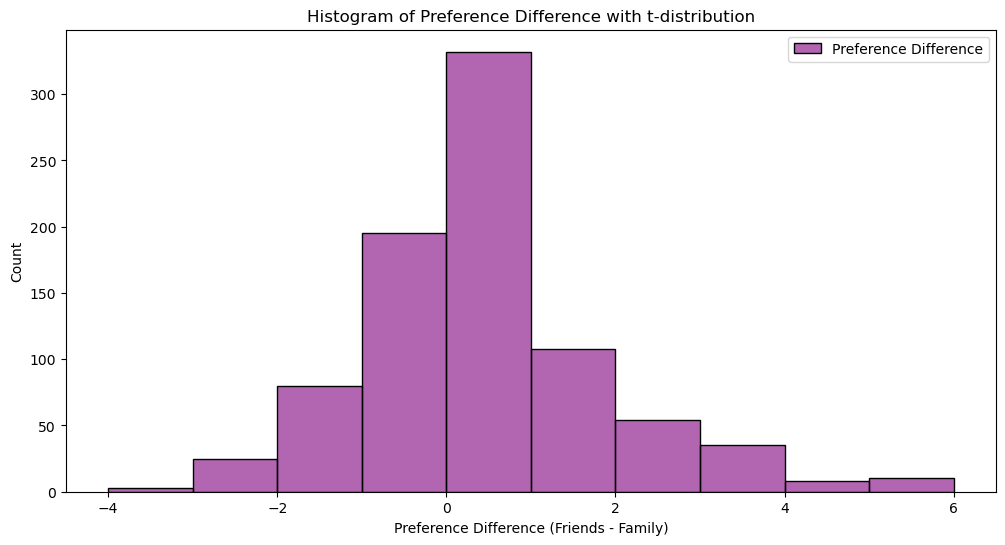

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import t

# Calculate the preference difference
combined_individual_data['preference_difference'] = combined_individual_data['friends_mean'] - combined_individual_data['family_mean']

# Parameters for t-distribution
df = len(combined_individual_data) - 2  # degrees of freedom
x = np.linspace(-4, 4, 1000)
t_dist = t.pdf(x, df)

# Plotting histograms
plt.figure(figsize=(12, 6))

# Histogram for preference_difference
sns.histplot(combined_individual_data['preference_difference'], bins=10, kde=False, color='purple', label='Preference Difference', alpha=0.6)

# Labels and title
plt.xlabel('Preference Difference (Friends - Family)')
plt.ylabel('Count')
plt.title('Histogram of Preference Difference with t-distribution')
plt.legend()

# Show the plot
plt.show()


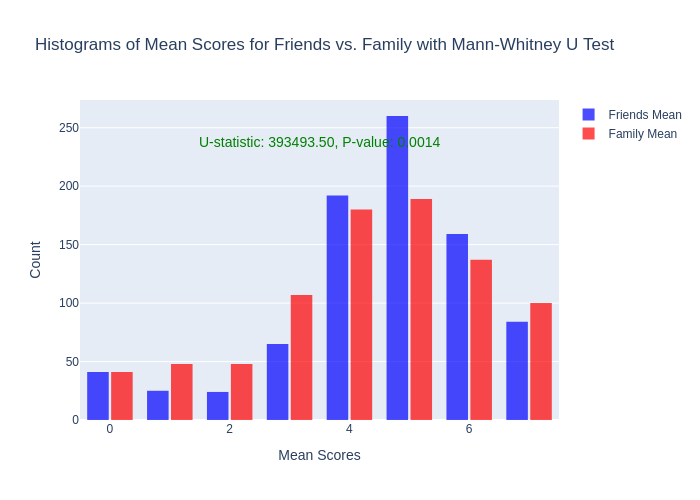

In [20]:
import plotly.graph_objects as go
from scipy.stats import mannwhitneyu

# Perform a Mann-Whitney U test
u_stat, p_value = mannwhitneyu(combined_individual_data['friends_mean'], combined_individual_data['family_mean'])

# Create histograms
fig = go.Figure()

# Friends mean histogram
fig.add_trace(go.Histogram(
    x=combined_individual_data['friends_mean'],
    nbinsx=10,
    name='Friends Mean', # name used in legend and hover labels
    marker_color='blue',
    opacity=0.7
))

# Family mean histogram
fig.add_trace(go.Histogram(
    x=combined_individual_data['family_mean'],
    nbinsx=10,
    name='Family Mean',
    marker_color='red',
    opacity=0.7
))

# Update layout
fig.update_layout(
    title_text='Histograms of Mean Scores for Friends vs. Family with Mann-Whitney U Test',
    xaxis_title_text='Mean Scores',
    yaxis_title_text='Count',
    bargap=0.2, # gap between bars of adjacent location coordinates
    bargroupgap=0.1, # gap between bars of the same location coordinates
    annotations=[
        dict(
            x=0.5,
            y=0.9,
            xref='paper',
            yref='paper',
            text=f'U-statistic: {u_stat:.2f}, P-value: {p_value:.4f}',
            showarrow=False,
            font=dict(size=14, color='green')
        )
    ]
)

# Show the plot
fig.show(renderer = 'png')


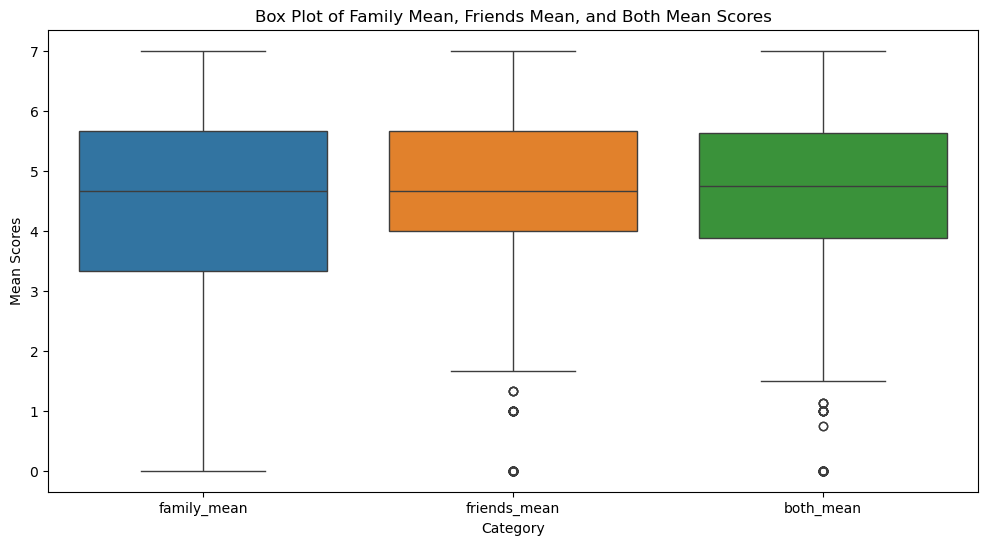

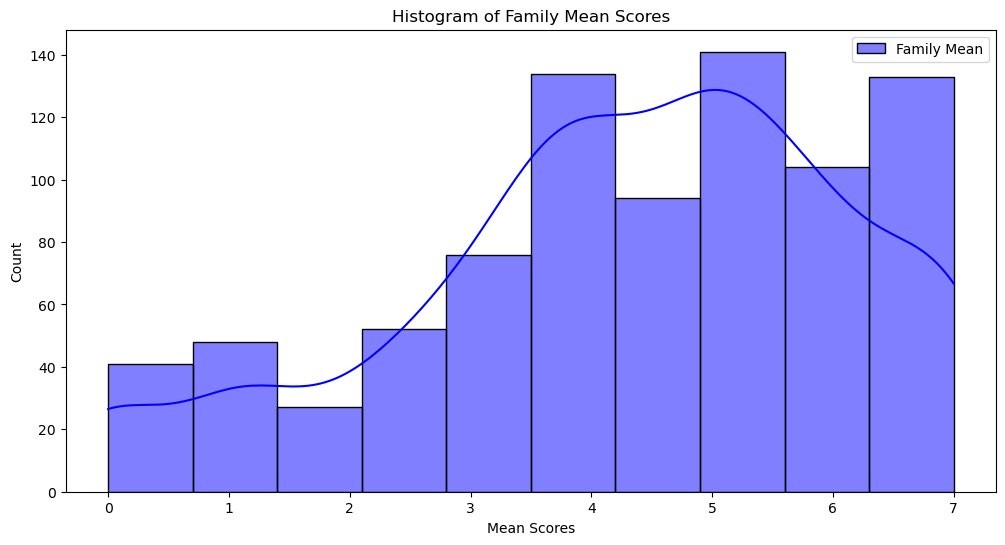

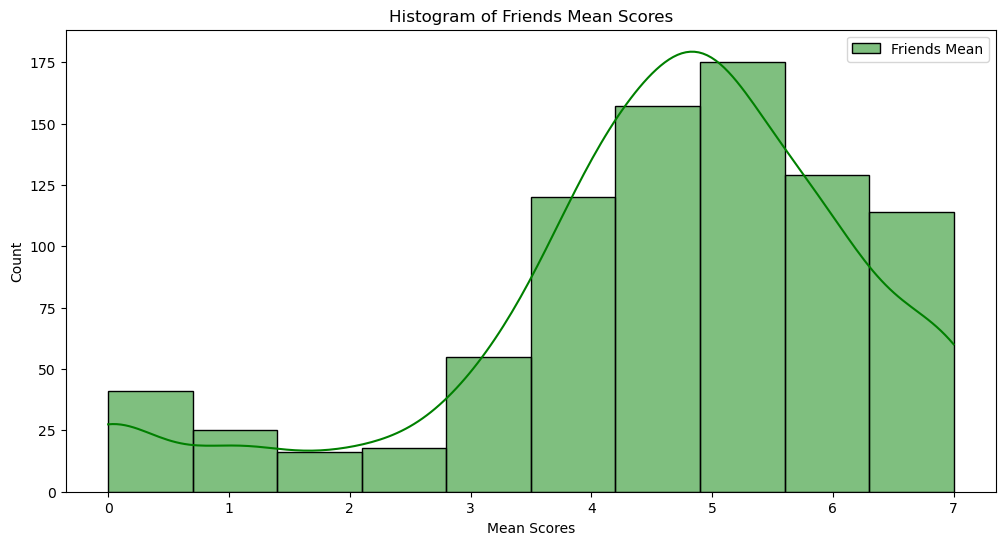

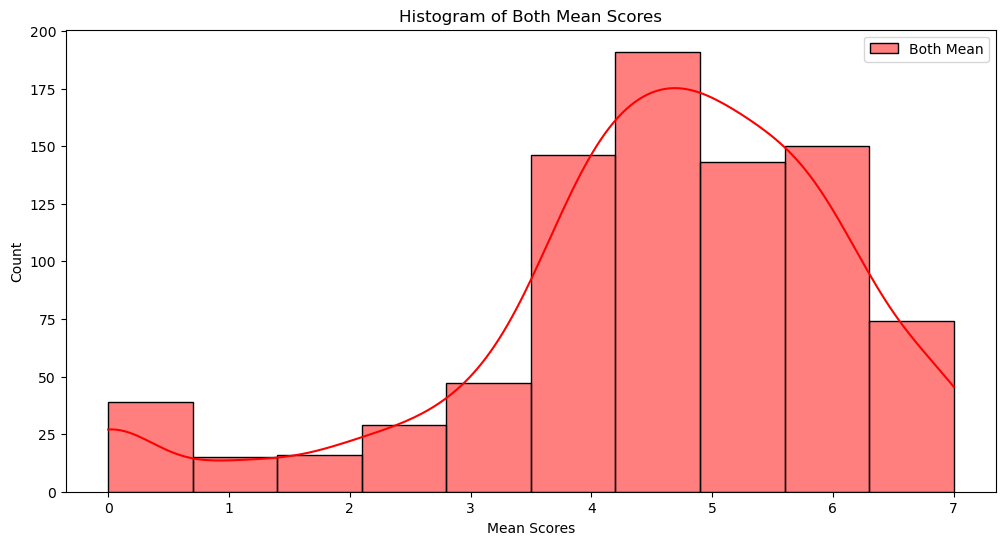

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
# Box plot 
plt.figure(figsize=(12, 6)) 
sns.boxplot(data=combined_individual_data[['family_mean', 'friends_mean', 'both_mean']]) 
plt.title('Box Plot of Family Mean, Friends Mean, and Both Mean Scores') 
plt.xlabel('Category') 
plt.ylabel('Mean Scores')
plt.show()

# Histogram for Family Mean
plt.figure(figsize=(12, 6))
sns.histplot(combined_individual_data['family_mean'], bins=10, kde=True, color='blue', label='Family Mean')
plt.title('Histogram of Family Mean Scores')
plt.xlabel('Mean Scores')
plt.ylabel('Count')
plt.legend()
plt.show()

# Histogram for Friends Mean
plt.figure(figsize=(12, 6))
sns.histplot(combined_individual_data['friends_mean'], bins=10, kde=True, color='green', label='Friends Mean')
plt.title('Histogram of Friends Mean Scores')
plt.xlabel('Mean Scores')
plt.ylabel('Count')
plt.legend()
plt.show()

# Histogram for Both Mean
plt.figure(figsize=(12, 6))
sns.histplot(combined_individual_data['both_mean'], bins=10, kde=True, color='red', label='Both Mean')
plt.title('Histogram of Both Mean Scores')
plt.xlabel('Mean Scores')
plt.ylabel('Count')
plt.legend()
plt.show()
